## Walking Through the Basic Workflow of Sci-Kit Learn

* start-finish Workflow
* 1: Getting the data ready
* 2: Choose the right model settings for the data
* 3: Fit the Model
* 4: Evaluating the Model
* 5: Improve the Model

In [1]:
# 1: Getting the data ready
import pandas as pd
import numpy as np
df= pd.read_csv('heart-disease.csv')

In [2]:
X = df.drop('target', axis=1)
y = df['target']
print(X.head(),y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2   0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [3]:
#2 Choose the right model settings for the data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.get_params()
# We will stick with the boilerplate parameters for now.

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
#We need to split our data into training and test sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=.2)


In [5]:
# 3: Fitting our data to the model
rfc.fit(xtrain, ytrain);
'''Notice that the training sets were used as opposed to the test sets. We need to keep them separate so the 
model doesn't cheat'''

"Notice that the training sets were used as opposed to the test sets. We need to keep them separate so the \nmodel doesn't cheat"

In [6]:
import numpy as np
rfc.predict(np.array([0,4,5,2]).reshape(-1,1))

ValueError: X has 1 features, but DecisionTreeClassifier is expecting 13 features as input.

In [7]:
# Predictions should look like the training set rows with 13 'features':
xtrain.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3


In [8]:
#The model has the training set down pat, lets find out how it fares on the test data
rfc.score(xtrain,ytrain)

1.0

In [9]:
# 4: Evaluating the Model

y_preds = rfc.predict(xtest)
# the model is fed values to extrapolate from. Let's see how it did
rfc.score(xtest, ytest)

0.8032786885245902

In [10]:
# Let's find out a bit more about how it's doing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_preds,ytest))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.81      0.81      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [11]:
print(confusion_matrix(y_preds,ytest))

[[24  6]
 [ 6 25]]


In [12]:
print(accuracy_score(y_preds,ytest))

0.8032786885245902


In [13]:
# 5: Improve the Model

# we will change the amount of n estimators
for i in [10,100,1000]:
    print(f'model with {i} estimators')
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(xtrain,ytrain)
    y_preds= rfc.predict(xtest)
    print(accuracy_score(y_preds,ytest))
#10 estimators is marginally better

model with 10 estimators
0.8032786885245902
model with 100 estimators
0.819672131147541
model with 1000 estimators
0.8360655737704918


In [14]:
# 6: save_model and load it
from joblib import dump, load
dump(rfc, 'rf_heart_disease_model.joblib')

['rf_heart_disease_model.joblib']

In [15]:
ld_model =load('rf_heart_disease_model.joblib')
ld_model.score(xtest,ytest)

0.8360655737704918

## 1. Getting the Data Ready

In [16]:
#1.1: making sure the data is numerical
df = pd.read_csv('car-sales-extended.csv')
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [17]:
df.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [18]:
#splitting the data into X,y
X = df.drop('Price', axis=1)
y= df['Price']
# Test-Train split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

In [19]:
# set up our model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)
rfr.score(xtest,ytest)

ValueError: could not convert string to float: 'Honda'

In [20]:
#Treating the categorical data -> Convert to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
''' We encode categorical data from doors because there is not a linear relationship.
There is an intangible difference between 3, 4, and 5 doors on a car'''
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
X_T = pd.DataFrame(data=transformed_X)
X_T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [21]:
# Alternative to One Hot encoder:
dummies = pd.get_dummies(df[['Make', 'Colour', 'Doors']])
alt_X = pd.concat([dummies,df['Odometer (KM)']], axis=1)
alt_X.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Odometer (KM)
0,4,0,1,0,0,0,0,0,0,1,35431
1,5,1,0,0,0,0,1,0,0,0,192714
2,4,0,1,0,0,0,0,0,0,1,84714
3,4,0,0,0,1,0,0,0,0,1,154365
4,3,0,0,1,0,0,1,0,0,0,181577


In [22]:
# Refitting the model
xtrain,xtest,ytrain,ytest = train_test_split(X_T, y, test_size=0.2)
rfr.fit(xtrain,ytrain)
rfr.score(xtest,ytest)


0.3188512702475267

In [22]:
#import data with missing values (NaN)
missing_data = pd.read_csv('car-sales-extended-missing-data.csv')
missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [23]:
missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [24]:
# Load new x,y
X = missing_data.drop('Price', axis=1)
y = missing_data['Price']

In [26]:
#retest the regression with the new data
#Treating the categorical data -> Convert to numerical

categorical_features = ['Make', 'Colour', 'Doors']
''' We encode categorical data from doors because there is not a linear relationship.
There is an intangible difference between 3, 4, and 5 doors on a car'''
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

# Though onehotencoder can handle nan, we should fill or drop it as a rule
# Pandas method:

In [27]:
# Reload the dataset
missing_data = pd.read_csv('car-sales-extended-missing-data.csv')

missing_data['Colour'].fillna('missing', inplace=True)
missing_data['Make'].fillna('missing', inplace=True)
missing_data['Odometer (KM)'].fillna(missing_data['Odometer (KM)'].mean(), inplace=True)
missing_data['Doors'].fillna(4, inplace=True)
missing_data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [28]:
missing_data.dropna(inplace=True)
len(missing_data.index)

950

In [29]:
missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [30]:
X = missing_data.drop('Price', axis=1)
y = missing_data['Price']
print(X.head(),y.head())

     Make Colour  Odometer (KM)  Doors
0   Honda  White        35431.0    4.0
1     BMW   Blue       192714.0    5.0
2   Honda  White        84714.0    4.0
3  Toyota  White       154365.0    4.0
4  Nissan   Blue       181577.0    3.0 0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64


In [31]:

categorical_features = ['Make', 'Colour', 'Doors']
''' We encode categorical data from doors because there is not a linear relationship.
There is an intangible difference between 3, 4, and 5 doors on a car'''
one_hot = OneHotEncoder()
transformer2 = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X2 = transformer2.fit_transform(missing_data)
X_T2 = pd.DataFrame(data=transformed_X2)
X_T2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


## Handling Missing Values with Sci-Kit Learn

In [32]:
missing_data = pd.read_csv('car-sales-extended-missing-data.csv')
missing_data.head()
missing_data.isna().sum()
missing_data.dropna(subset=['Price'], inplace=True)

In [33]:
X = missing_data.drop('Price', axis=1)
y = missing_data['Price']

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Define what the imputer passes
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define how each column will be imputed
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

#create an imputer object that will fit to the dataset
imputer = ColumnTransformer([('cat_imputer', cat_imputer, cat_features),
                             ('door_imputer', door_imputer, door_features),
                             ('num_imputer', num_imputer, num_features)])
filled_x = imputer.fit_transform(X)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [35]:
#
filled_df = pd.DataFrame(data=filled_x, columns=['Make', 'Color', 'Doors', 'Odometer'])
filled_df

,Make,Color,Doors,Odometer
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [36]:
#Check that there are no missing values
filled_df.isna().sum()

Make        0
Color       0
Doors       0
Odometer    0
dtype: int64

In [37]:
# Perform  one hot encoding one more time
categorical_features = ['Make', 'Color', 'Doors']

one_hot = OneHotEncoder()
transformer2 = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer2.fit_transform(filled_df)

transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [38]:
# Values have been encoded and there are no missing values

#We will split the data and model again
x_train, x_test, y_train, y_test = train_test_split(transformed_X, y)

rfr = RandomForestRegressor(n_estimators=20)

rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)


0.33864151303546297

## Choosing the Right Algorithm
algorithm/model/estimator
What kind of problem are we working with: 
* Classification? (cat or dog) 
* Regressional (Finding the number of Jellybeans in a jar )

### Regression Models

In [39]:
from sklearn.datasets import load_boston
boston= load_boston()
boston;

In [40]:
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target']) 
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
len(boston_df)

506

In [42]:
# We've settle on RidgeRegression as our Model.
from sklearn.linear_model import Ridge

np.random.seed(31)

#Split the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=.2)

#Instantiate and test
rr_model = Ridge()
rr_model.fit(x_train,y_train)
rr_model.score(x_test,y_test)



0.7792121444980936

What further improvements can we make?

We're trying the RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(19)

#Create a model object
rfr_model = RandomForestRegressor()

#Set up variables and labels
X = boston_df.drop('target', axis=1)
y = boston_df['target']

#split the data
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=.2)

#Instantiate the random forest regressor
rfr_model.fit(x_train,y_train)

#Evaluate the results
rfr_model.score(x_test,y_test)

0.8663956768955836

## Choosing the Right Model for a Classification Problem
Using our heart disease dataset as our base, the sklearn machine learning map suggest Linear SVC

In [50]:
from sklearn.svm import LinearSVC
# load the heart disease csv as a dataframe
hd_df = pd.read_csv('heart-disease.csv')

# load the model
svc_model =LinearSVC()

#Set up features and labels
X=hd_df.drop('target', axis=1)
y=hd_df['target']

#Split the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and test the model
svc_model.fit(x_train, y_train)
svc_model.score(x_test, y_test)

C:\Users\fritz\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7704918032786885

This model gives wildly different scores, ranging from 45% to 83%. Let's see if we can optimize it.

In [54]:
# Sklearn says to use the ensemble models if svc doesn't work, so we'll try random forest classifier.
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

#Set up features and labels
X=hd_df.drop('target', axis=1)
y=hd_df['target']

#Split the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and test the model
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.8524590163934426

All above 80%, so much more consistent than the linear SVC model. 

## Evaluating the Success of a Model?

How can we measure the success of the model and verify that it is working correctly?
* score, predict, precision/precision scores
* `predict_proba()` to gauge the certainty of the model
* cross validation to make sure that the model isn't getting lucky
* confusion matrices to elaborate on accurate and innaccurate predictions
* ROC Curves

In [55]:
# We'll reload our previous model
from sklearn.ensemble import RandomForestClassifier
#this time we will import metrics
from sklearn import metrics

# We'll make this reproducible
np.random.seed(19)
rfc = RandomForestClassifier()

#Set up features and labels
X=hd_df.drop('target', axis=1)
y=hd_df['target']

#Split the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate the model
rfc.fit(x_train, y_train)

#score gives us a basic accuracy between the x_test and y_test
rfc.score(x_test, y_test)


0.819672131147541

In [57]:
# Using predict in conjunction with functions like accuracy score works
y_preds = rfc.predict(x_test)
metrics.accuracy_score(y_test,y_preds)

0.819672131147541

In [60]:
# This method can also show things like precision
metrics.precision_score(y_test,y_preds)

0.7631578947368421

### Predict Probability

In [62]:
# In order to gauge the models certainty in their predictions, we can use predict_proba()
rfc.predict_proba(x_test)[:5]

array([[0.22, 0.78],
       [1.  , 0.  ],
       [0.53, 0.47],
       [0.38, 0.62],
       [0.22, 0.78]])

predict_proba() shows the probability of the x value set representing one of the categories: in this case, heart disease or not.

### Cross Validation
We can also implement cross validation which separates n different test and train sets and aggregates the model's accuracies from each set

In [70]:
#import the cross validator
from sklearn.model_selection import cross_validate

np.random.seed(19)

# Here are the features and labels we will feed it again.
X=hd_df.drop('target', axis=1)
y=hd_df['target']

# We need to instantiate the model again
rfc = RandomForestClassifier()

cv_results = cross_validate(rfc, X, y, cv=5)
# cv signifies 5 cross validation splits.
np.average(cv_results['test_score'])


0.8283060109289618

There is the average of 5 cross validation splits. A more accurate and representative figure than say 100 loops of score() functions.


### Confusion Matrices
But in some models, we need to know more than simply the accuracy or precision. We need to know how the model got predictions wrong, and how it got them right.

In [71]:
# We have already imported metrics so we can create a confusion matrix right away.
confusion_matrix = metrics.confusion_matrix(y_test, y_preds)
confusion_matrix

array([[21,  9],
       [ 2, 29]], dtype=int64)

The confusion matrix displays in order of [0,0],[0,1],[1,0],[1,1] the true negatives, false positive, false negative, true positives.

In many instances, a higher prevalence of false negatives would be more dangerous than false positives. You can always retest to confirm/deny the positive results of cancer, but you likely won't test again if the results are (false) negative. 

This model seems have less false negatives, which is good. 

## Area under the reciever operating characteristic curve
* ROC
* AUC
#### ROC metrics are a comparison between the true positive rate and the false positive rate

In [77]:
# We will need to set the model up again
np.random.seed(19)

X=hd_df.drop('target', axis=1)
y=hd_df['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc.fit(x_train, y_train)

#the roc score needs to be fed the positive probability predictions from predict_proba()
pprob = rfc.predict_proba(x_test)
positives = pprob[:,1]

# The false positive rate, true positive rate and the threshold for function decision making are returned
fpr, tpr, thresholds = metrics.roc_curve(y_test, positives)
fpr,tpr,thresholds

''

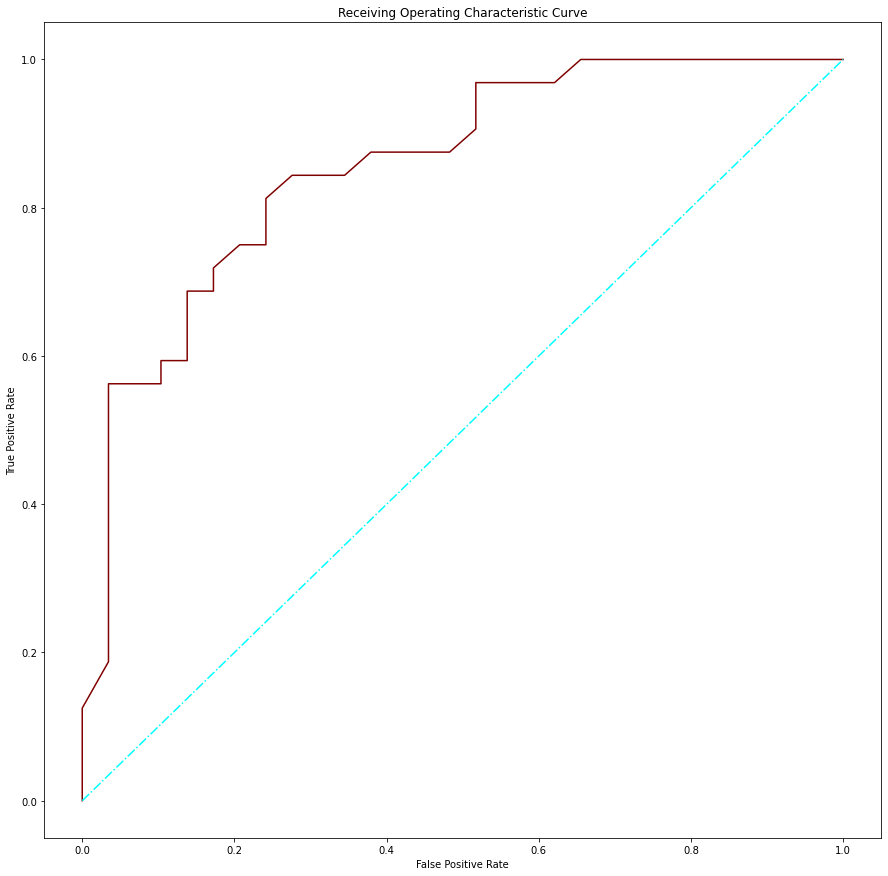

In [82]:
# Now we will plot the roc_curve
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15), )
ax.plot(fpr,tpr,color='maroon', label='ROC Curve')
# The guessing line is the probability of the theoretical guess: 50-50
ax.plot([0,1], color='cyan', linestyle='dashdot', label='guessing')
ax.set(title='Receiving Operating Characteristic Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
;

So when the roc score is .8, there is 1 false positive for every 4 true positive predictions. 

In [ ]:
auc_score = metrics.roc_auc_score(y_test, positives)
auc_score